In [1]:
%load_ext autoreload
%autoreload
%matplotlib widget
import importlib
from SOAEpeaks import load_df
import phaseco as pc
from phaseco import *
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy.signal.windows import gaussian
importlib.reload(pc)
import ipywidgets as widgets
from IPython.display import display


In [ ]:
df = load_df(laptop=True, dfs_to_load=["Curated Data"])
wf = df[df['species'] == 'Anolis'].iloc[0]['wf']
wf_title = df[df['species'] == 'Anolis'].iloc[0]['filepath'].split('\\')[-1]
fs = 44100
del df


Loading Curated Data


In [ ]:
"Visualize Gaussian Window"
xi = 0.0025
tau = 0.05
nperseg = tau * fs
t = np.arange(0, tau, 1/fs)
rho = 7.5
xi2 = xi * 2
rho2 = rho*2

# Define the overlap region based on xi and tau
overlap_start_idx = int(xi * fs)  # Starting index of overlap
overlap_start_idx2 = int(xi2 * fs)

# Adjusted time array for overlap
t_overlap = t[overlap_start_idx:]
t_overlap2 = t[overlap_start_idx2:]




# Get sigma as a function of desired proportion of xi you want the gaussian FWHM to be
sigmaS = get_sigmaS(rho=rho, xi=xi, fs=fs)
gauss_window = get_window(('gauss', sigmaS), nperseg)

# plt.close('all')
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.title(fr'$\rho = {rho}, \xi = {xi*1000}ms, \tau = {tau*1000}ms$')
plt.plot(t, gauss_window, label="Gauss")
plt.plot(t + xi, gauss_window, label="Gauss (Next Win)")
plt.legend()
plt.ylim(-0.1, 1.1)

# Calculate ratio for subplot 1
AUC_window = np.trapz(gauss_window, t)
overlap_window = np.minimum(gauss_window, np.roll(gauss_window, int(xi*fs)))[overlap_start_idx:]
AUC_overlap = np.trapz(overlap_window, t_overlap)
ratio_overlap = AUC_overlap / AUC_window
print(f"Subplot 1: AUC Overlap / AUC Window = {ratio_overlap:.4f}")
plt.plot(t_overlap, overlap_window, label="Overlap", color='red', lw=5, alpha=0.2)

sigmaS_xi2x = get_sigmaS(rho=rho, xi=xi2, fs=fs)
gauss_window_xi2x = get_window(('gauss', sigmaS_xi2x), nperseg)



# Subplot 2 (xi2x)
plt.subplot(2, 2, 2)
plt.title(fr'$\rho = {rho}, \xi = {xi2*1000}ms, \tau = {tau*1000}ms$')
plt.plot(t, gauss_window_xi2x, label="Gauss")
plt.plot(t + xi2, gauss_window_xi2x, label="Gauss (Next Win)")
plt.ylim(-0.1, 1.1)

sigmaS_rho2x = get_sigmaS(rho=rho2, xi=xi, fs=fs)
gauss_window_rho2x = get_window(('gauss', sigmaS_rho2x), nperseg)

# Ratio 2
AUC_window_2 = np.trapz(gauss_window_xi2x, t)
overlap_window_2 = np.minimum(gauss_window_xi2x, np.roll(gauss_window_xi2x, int(xi2*fs)))[overlap_start_idx2:]
AUC_overlap_2 = np.trapz(overlap_window_2, t_overlap2)
ratio_overlap_2 = AUC_overlap_2 / AUC_window_2
plt.plot(t_overlap2, overlap_window_2, label="Overlap", color='red', lw=5, alpha=0.2)
print(f"Subplot 2: AUC Overlap / AUC Window = {ratio_overlap_2:.4f}")

# Subplot 3 (rho2x)
plt.subplot(2, 2, 3)
plt.title(fr'$\rho = {rho2}, \xi = {xi*1000}ms, \tau = {tau*1000}ms$')
plt.plot(t, gauss_window_rho2x, label="Gauss")
plt.plot(t + xi, gauss_window_rho2x, label="Gauss (Next Win)")
plt.ylim(-0.1, 1.1)

# Ratio 3
AUC_window_3 = np.trapz(gauss_window_rho2x, t)
overlap_window_3 = np.minimum(gauss_window_rho2x, np.roll(gauss_window_rho2x, int(xi*fs)))[overlap_start_idx:]
AUC_overlap_3 = np.trapz(overlap_window_3, t_overlap)
ratio_overlap_3 = AUC_overlap_3 / AUC_window_3
plt.plot(t_overlap, overlap_window_3, label="Overlap", color='red', lw=5, alpha=0.2)
print(f"Subplot 3: AUC Overlap / AUC Window = {ratio_overlap_3:.4f}")

# Subplot 4 (xi2x and rho2x)
sigmaS_xi2x_rho2x = get_sigmaS(rho=rho2, xi=xi2, fs=fs)
gauss_window_xi2x_rho2x = get_window(('gauss', sigmaS_xi2x_rho2x), nperseg)
plt.subplot(2, 2, 4)
plt.title(fr'$\rho = {rho2}, \xi = {xi2*1000}ms, \tau = {tau*1000}ms$')
plt.plot(t, gauss_window_xi2x_rho2x, label="Gauss")
plt.plot(t + xi2, gauss_window_xi2x_rho2x, label="Gauss (Next Win)")
plt.ylim(-0.1, 1.1)

AUC_window_4 = np.trapz(gauss_window_xi2x_rho2x, t)
overlap_window_4 = np.minimum(gauss_window_xi2x_rho2x, np.roll(gauss_window_xi2x_rho2x, int(xi2*fs)))[overlap_start_idx2:]
AUC_overlap_4 = np.trapz(overlap_window_4, t_overlap2)
ratio_overlap_4 = AUC_overlap_4 / AUC_window_4
plt.plot(t_overlap2, overlap_window_4, label="Overlap", color='red', lw=5, alpha=0.2)
print(f"Subplot 4: AUC Overlap / AUC Window = {ratio_overlap_4:.4f}")


# FINALIZE
plt.tight_layout()
plt.show()









In [ ]:
"""Basic C_xi and C_xi^sigma and plot"""
fs = 44100
xi = 0.0025
tauS = 2**11
tau = tauS / fs
rho = 1
f, psd = pc.get_welch(wf=wf, fs=fs, tauS=tauS)
f, C_xi = pc.get_coherence(wf=wf, fs=fs, tauS=tauS, xi=xi, ref_type="next_seg")
f, C_xi_sigma = pc.get_coherence(wf=wf, fs=fs, tauS=tauS, xi=xi, ref_type="next_seg", rho=rho)

plt.close('all')
plt.figure(figsize=(10, 6))
plt.suptitle(wf_title, fontsize=12)
plt.title(r"Coherence Measures ($\xi$=" + f"{xi*1000}ms, " + r"$\tau$=" + f"{tau*1000}ms)", fontsize=16)
plt.plot(f, C_xi, label=r"$C_{\xi}$")
plt.plot(f, C_xi_sigma, color='purple', label=r"$C_{\xi}^{\rho}$")
plt.legend(loc='lower right')
plt.ylabel("Vector Strength")
ax2 = plt.twinx()
ax2.plot(f, 10*np.log10(psd), color='r', label=r"PSD")
ax2.set_ylabel("PSD (dB)")
ax2.set_ylim(-110, -85)
plt.xlim(0, 6000)

plt.legend()
plt.show()

In [ ]:
"""Generate coherence dict""" 
rhos = [0.5, 1, 1.25, 1.5, 2, 5, 7.5, 10, 12.5, 15, 17.5, 20, 25, 30, 50, 100]

# Get initial rhos
tau = 0.05
xi = 0.0025
coherence_dict = {rho: pc.get_coherence(wf=wf, fs=fs, tau=tau, xi=xi, rho=rho, ref_type="next_seg")[1] for rho in rhos}

# Double xi
tau = 0.05
xi2x = 0.005
coherence_dict_xi2x = {rho: pc.get_coherence(wf=wf, fs=fs, tau=tau, xi=xi2x, rho=rho, ref_type="next_seg")[1] for rho in rhos}

# Double tau
tau2x = 0.1
xi = 0.0025
coherence_dict_tau2x = {rho: pc.get_coherence(wf=wf, fs=fs, tau=tau2x, xi=xi, rho=rho, ref_type="next_seg")[1] for rho in rhos}
# Get frequency axis for this one
f_tau2x = rfftfreq(int(tau2x*fs), 1/fs)
f = rfftfreq(int(tau*fs), 1/fs)

def add_rhos(rhos, rhos_to_add, coherence_dict, tau, xi):
    for rho in rhos_to_add:
        coherence_dict.update({rho: pc.get_coherence(wf=wf, fs=fs, tau=tau, xi=xi, rho=rho, ref_type="next_seg")[1]})
    rhos = np.sort(np.concatenate([rhos, rhos_to_add], axis=0))
    return rhos, coherence_dict

rhos_to_add = []

rhos, coherence_dict = add_rhos(rhos, rhos_to_add, coherence_dict, tau, xi)
rhos, coherence_dict_tau2x = add_rhos(rhos, rhos_to_add, coherence_dict_tau2x, tau2x, xi)
rhos, coherence_dict_xi2x = add_rhos(rhos, rhos_to_add, coherence_dict_xi2x, tau, xi2x)

# with open('rho_comp_coherence_dicts2.pkl', 'wb') as file:
#     pickle.dump((coherence_dict, coherence_dict_xi2x, coherence_dict_tau2x), file)
# with open('rho_comp_coherence_dicts2.pkl', 'rb') as file:
#     coherence_dict, coherence_dict_xi2x, coherence_dict_tau2x = pickle.load(file)

In [ ]:
"""Plot with Sliders"""
plt.close('all')

# Create the figure
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 6))
plt.suptitle(fr'$C_{{\xi}}^{{\sigma}}$ for {wf_title}', fontsize=12)

# Plot reference curves on the first subplot
ax1.plot(f, C_xi, color='purple', label=r'$C_{\xi}$')
ax1.set_xlim(0, 6000)
psd_ax = ax1.twinx()
psd_ax.plot(f, 10*np.log10(psd), color='red', label='PSD', alpha=0.5, lw=1)
psd_ax.set_ylim(-110, -85)
psd_ax.legend(loc='upper right')

# Plot initial curves on the second subplot
line, = ax2.plot(f, coherence_dict[rhos[0]], label=fr'$\rho={rhos[0]}$', alpha=0.7)
line_tau2x, = ax2.plot(f_tau2x, coherence_dict_tau2x[rhos[0]], label=fr'$2*\tau, \rho={rhos[0]}$', alpha=0.7)
line_xi2x, = ax2.plot(f, coherence_dict_xi2x[rhos[0]], label=fr'$2*\xi, \rho={rhos[0]}$', alpha=0.7)

ax2.set_title(r"Coherence Measures ($\xi$=" + f"{xi*1000}ms, " + r"$\tau$=" + f"{tau*1000}ms)", fontsize=16)
ax2.set_xlim(0, 6000)
ax2.set_ylim(0, 1)
ax2.set_ylabel("Vector Strength")

# Function to update the plot
def update_plot(rho, rho_tau2x, rho_xi2x):
    line.set_ydata(coherence_dict[rho])
    line.set_label(fr'$\rho={rho}$')
    
    line_tau2x.set_ydata(coherence_dict_tau2x[rho_tau2x])
    line_tau2x.set_label(fr'$2*\tau, \rho={rho_tau2x}$')
    
    line_xi2x.set_ydata(coherence_dict_xi2x[rho_xi2x])
    line_xi2x.set_label(fr'$2*\xi, \rho={rho_xi2x}$')
    
    ax1.legend()
    ax2.legend()
    fig.canvas.draw_idle()

# Create sliders
rho_slider = widgets.SelectionSlider(\
    options=rhos,
    value=rhos[0],
    description="rho",
    continuous_update=False
)

rho_tau2x_slider = widgets.SelectionSlider(
    options=rhos,
    value=rhos[0],
    description="rho_tau2x",
    continuous_update=False
)

rho_xi2x_slider = widgets.SelectionSlider(
    options=rhos,
    value=rhos[0],
    description="rho_xi2x",
    continuous_update=False
)

# Interactive widget
widgets.interact(update_plot, rho=rho_slider, rho_tau2x=rho_tau2x_slider, rho_xi2x=rho_xi2x_slider)

plt.show()

In [32]:
print(len(wf) / 441)

12000.0


In [ ]:
"Loss-of-coherogram calculations"
tauS = 2**11
tau = tauS / fs
xis = np.linspace(0.0025, tau, 20)
max_xiS = max(xis) * fs
f = rfftfreq(tauS, 1/fs)
# Make sure we have a consistent number of segments to take vector strenght over since this will change with xi
N_segs = int((len(wf) - tauS) / max_xiS) 

rho = None
coherences = np.zeros((len(f), len(xis)))
for i, xi in enumerate(xis):
    coherences[:, i] = get_coherence(wf=wf, fs=fs, tauS=tauS, xi=xi, ref_type="next_seg", N_segs=N_segs, rho=rho)[0]
    
rho = None
coherences_rho = np.zeros((len(f), len(xis)))
for i, xi in enumerate(xis):
    coherences_rho[:, i] = get_coherence(wf=wf, fs=fs, tauS=tauS, xi=xi, ref_type="next_seg", N_segs=N_segs, rho=rho)[0]

TypeError: Dimensions of C (20, 1025) should be one smaller than X(20) and Y(1025) while using shading='flat' see help(pcolormesh)

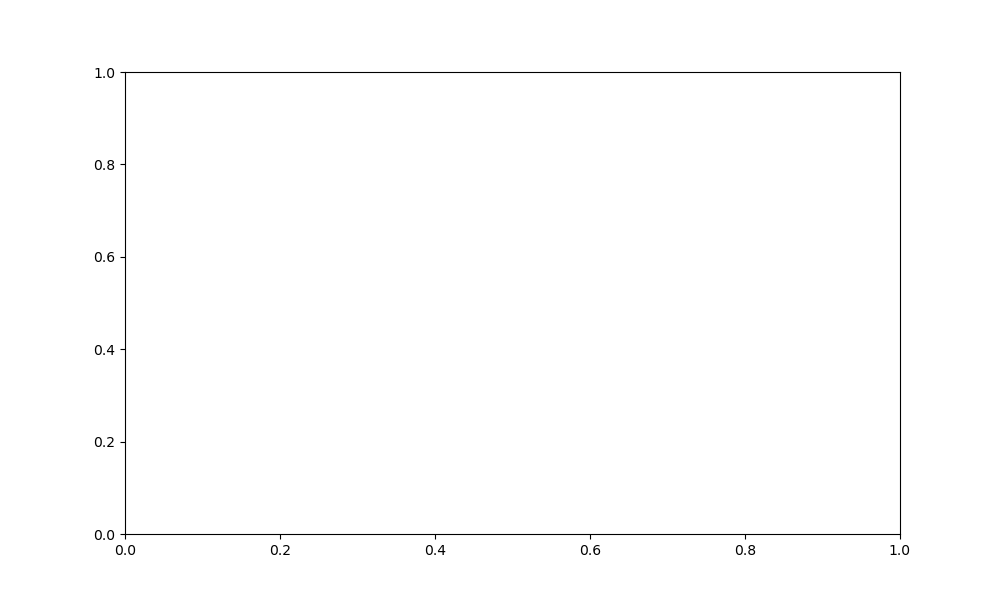

In [ ]:
"Loss-of-coherogram Plot"
plt.figure(figsize=(10, 6))
# make meshgrid
xx, yy = np.meshgrid(xis, f / 1000) 
  
# plot the heatmap
vmin = np.min(coherences)
vmax = np.max(coherences)
cmap = "inferno"
heatmap = plt.pcolormesh(xx, yy, coherences, vmin=vmin, vmax=vmax, cmap=cmap, shading='auto')

# get and set label for cbar
cbar = plt.colorbar(heatmap)
cbar.set_label("Vector Strength")

# set limits
plt.xlim(0, 6000)

# set axes labels and titles
plt.xlabel("Xi [ms]")
plt.ylabel("Frequency [kHz]")
plt.title(f"Lossogram of {wf_title}: tau={tau}, xi={xi}")
plt.show()
      